In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\ABISA\Downloads\Wine_clust.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
data.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [8]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(data)

# k-means Clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
# Select the columns to use for clustering
X = data.iloc[:, 1:]


In [11]:
# Create a list to hold the WCSS values for each k
wcss = []

In [12]:
# Calculate WCSS for a range of k values
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\ABISA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


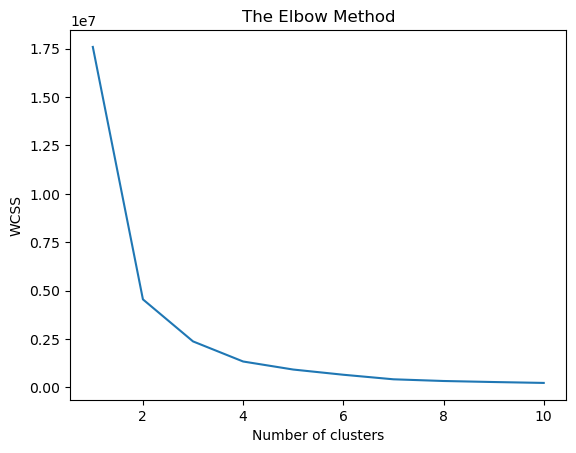

In [13]:
# Plot the WCSS values for each k
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
data=pd.read_csv(r"C:\Users\ABISA\Downloads\Wine_clust.csv")

In [15]:
data1=data.iloc[:,[3,4]].values

In [16]:
type(data1)

numpy.ndarray

In [17]:
kmeans =KMeans(n_clusters =3,init= 'k-means++',random_state =42)
y_kmeans=kmeans.fit_predict(data1)

In [18]:
y_kmeans

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0])

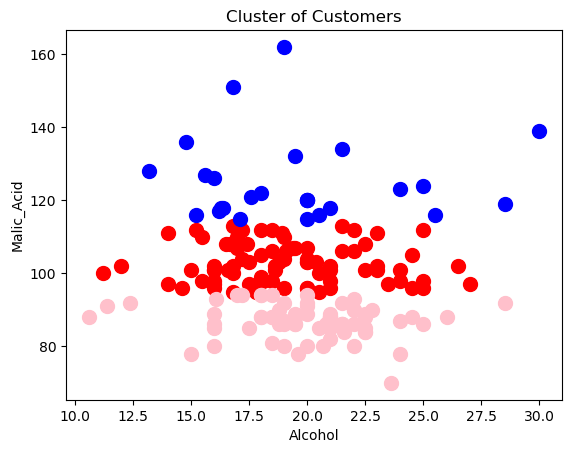

In [19]:
plt.scatter(data1[y_kmeans==0,0],data1[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(data1[y_kmeans==1,0],data1[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(data1[y_kmeans==2,0],data1[y_kmeans==2,1],s=100,c='pink',label='Cluster 3')
plt.title('Cluster of Customers')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.show()

In [20]:
import scipy.cluster.hierarchy as sch

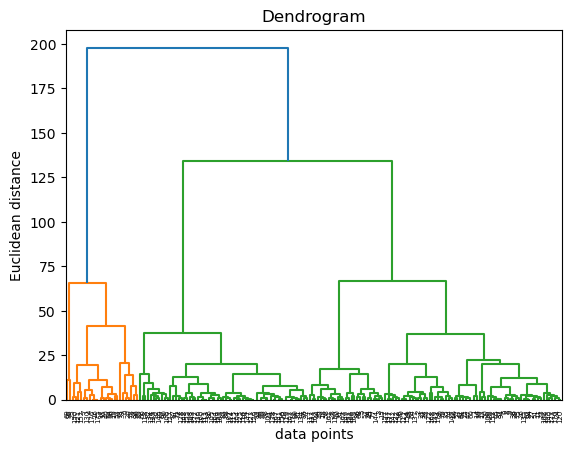

In [21]:
dendrogram =sch.dendrogram(sch.linkage(data1,method ='ward'))
plt.title('Dendrogram')
plt.xlabel('data points')
plt.ylabel('Euclidean distance')
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
ahc=AgglomerativeClustering(n_clusters =3,affinity='euclidean',linkage='ward')
y_ahc =ahc.fit_predict(data1)

In [23]:
y_ahc

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0], dtype=int64)

In [24]:
from sklearn.metrics import silhouette_score
sil_ahc=silhouette_score(data1,y_ahc)

In [25]:
sil_ahc

0.47030670696825333

In [26]:
ahc1=AgglomerativeClustering(n_clusters =4,affinity='euclidean',linkage='ward')
y_ahc1 =ahc1.fit_predict(data1)
sil_ahc1 =silhouette_score(data1,y_ahc1)
sil_ahc1

0.40546674840185654

In [27]:
ahc2=AgglomerativeClustering(n_clusters =5,affinity='euclidean',linkage='ward')
y_ahc2 =ahc2.fit_predict(data1)
sil_ahc2=silhouette_score(data1,y_ahc2)
sil_ahc2

0.4227594634418217

In [28]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [29]:
# Final model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(wine_scaled)
data['cluster'] = kmeans.labels_